# PART 2: Intermediate Data Processing

In this Jupyter Notebook, we further investigate the interim datasets through a **processing** lens: we analyze, transform, scale, encode, reduce, and otherwise munge our data to prepare it for predictive analysis and machine learning-based modeling. 

- **NOTE**: Before working through this notebook, please ensure that you have all necessary dependencies as denoted in [Section A: Imports and Initializations](#section-A) of this notebook.

- **NOTE**: Before working through Sections A-D of this notebook, please run all code cells in [Appendix A: Supplementary Custom Objects](#appendix-A) to ensure that all relevant functions and objects are appropriately instantiated and ready for use.

---

## 🔵 TABLE OF CONTENTS 🔵 <a name="TOC"></a>

Use this **table of contents** to navigate the various sections of the processing notebook.

#### 1. [Section A: Imports and Initializations](#section-A)

    All necessary imports and object instantiations for data processing.

#### 2. [Section B: Specialized Encoding](#section-B)

    Data encoding operations, including value range mapping, 
    correlational plotting, and categorical encoding.

#### 3. [Section C: Data Scaling & Transformation](#section-C)

    Data transformation techniques, including standard scaling/normalization
    and feature reduction techniques.

#### 4. [Section D: Saving Our Processed Datasets](#section-D)

    Saving processed data states for further access.

#### 5. [Appendix A: Supplementary Custom Objects](#appendix-A)

    Custom Python object architectures used throughout the data processing.
    
---

## 🔹 Section A: Imports and Initializations <a name="section-A"></a>

General Importations for Data Manipulation and Visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Algorithms for Data Scaling and Feature Reduction.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Custom Algorithmic Structures for Processed Data Visualization.

In [3]:
import sys
sys.path.append("../structures/")
from dataset_processor import Dataset_Processor
from custom_structures import corrplot_

#### Instantiate Our Processor Engine

Custom Processor Class for Target-Oriented Data Modification.

**NOTE**: Please refer to _Appendix A: Supplementary Custom Objects_ to view the fully implemented processor object.

In [4]:
proc = Dataset_Processor()

##### [(back to top)](#TOC)

---

## 🔹 Section B: Data Encoding <a name="section-B"></a>

#### Read Our Preprocessed Data Into Conditional DataFrame(s)

**Call** `.load_data()` **method to load in all conditionally separated interim datasets.**

_NOTE_: Currently loading in both datasets independently using defaulted condition `which="both"`.

In [15]:
(df_train_i, df_test_i) = proc.load_data()

#### Produce Correlation Matrix

**NOTE**: Zooming in manually is required to view exact correlational values due to figure sizing constraints. 

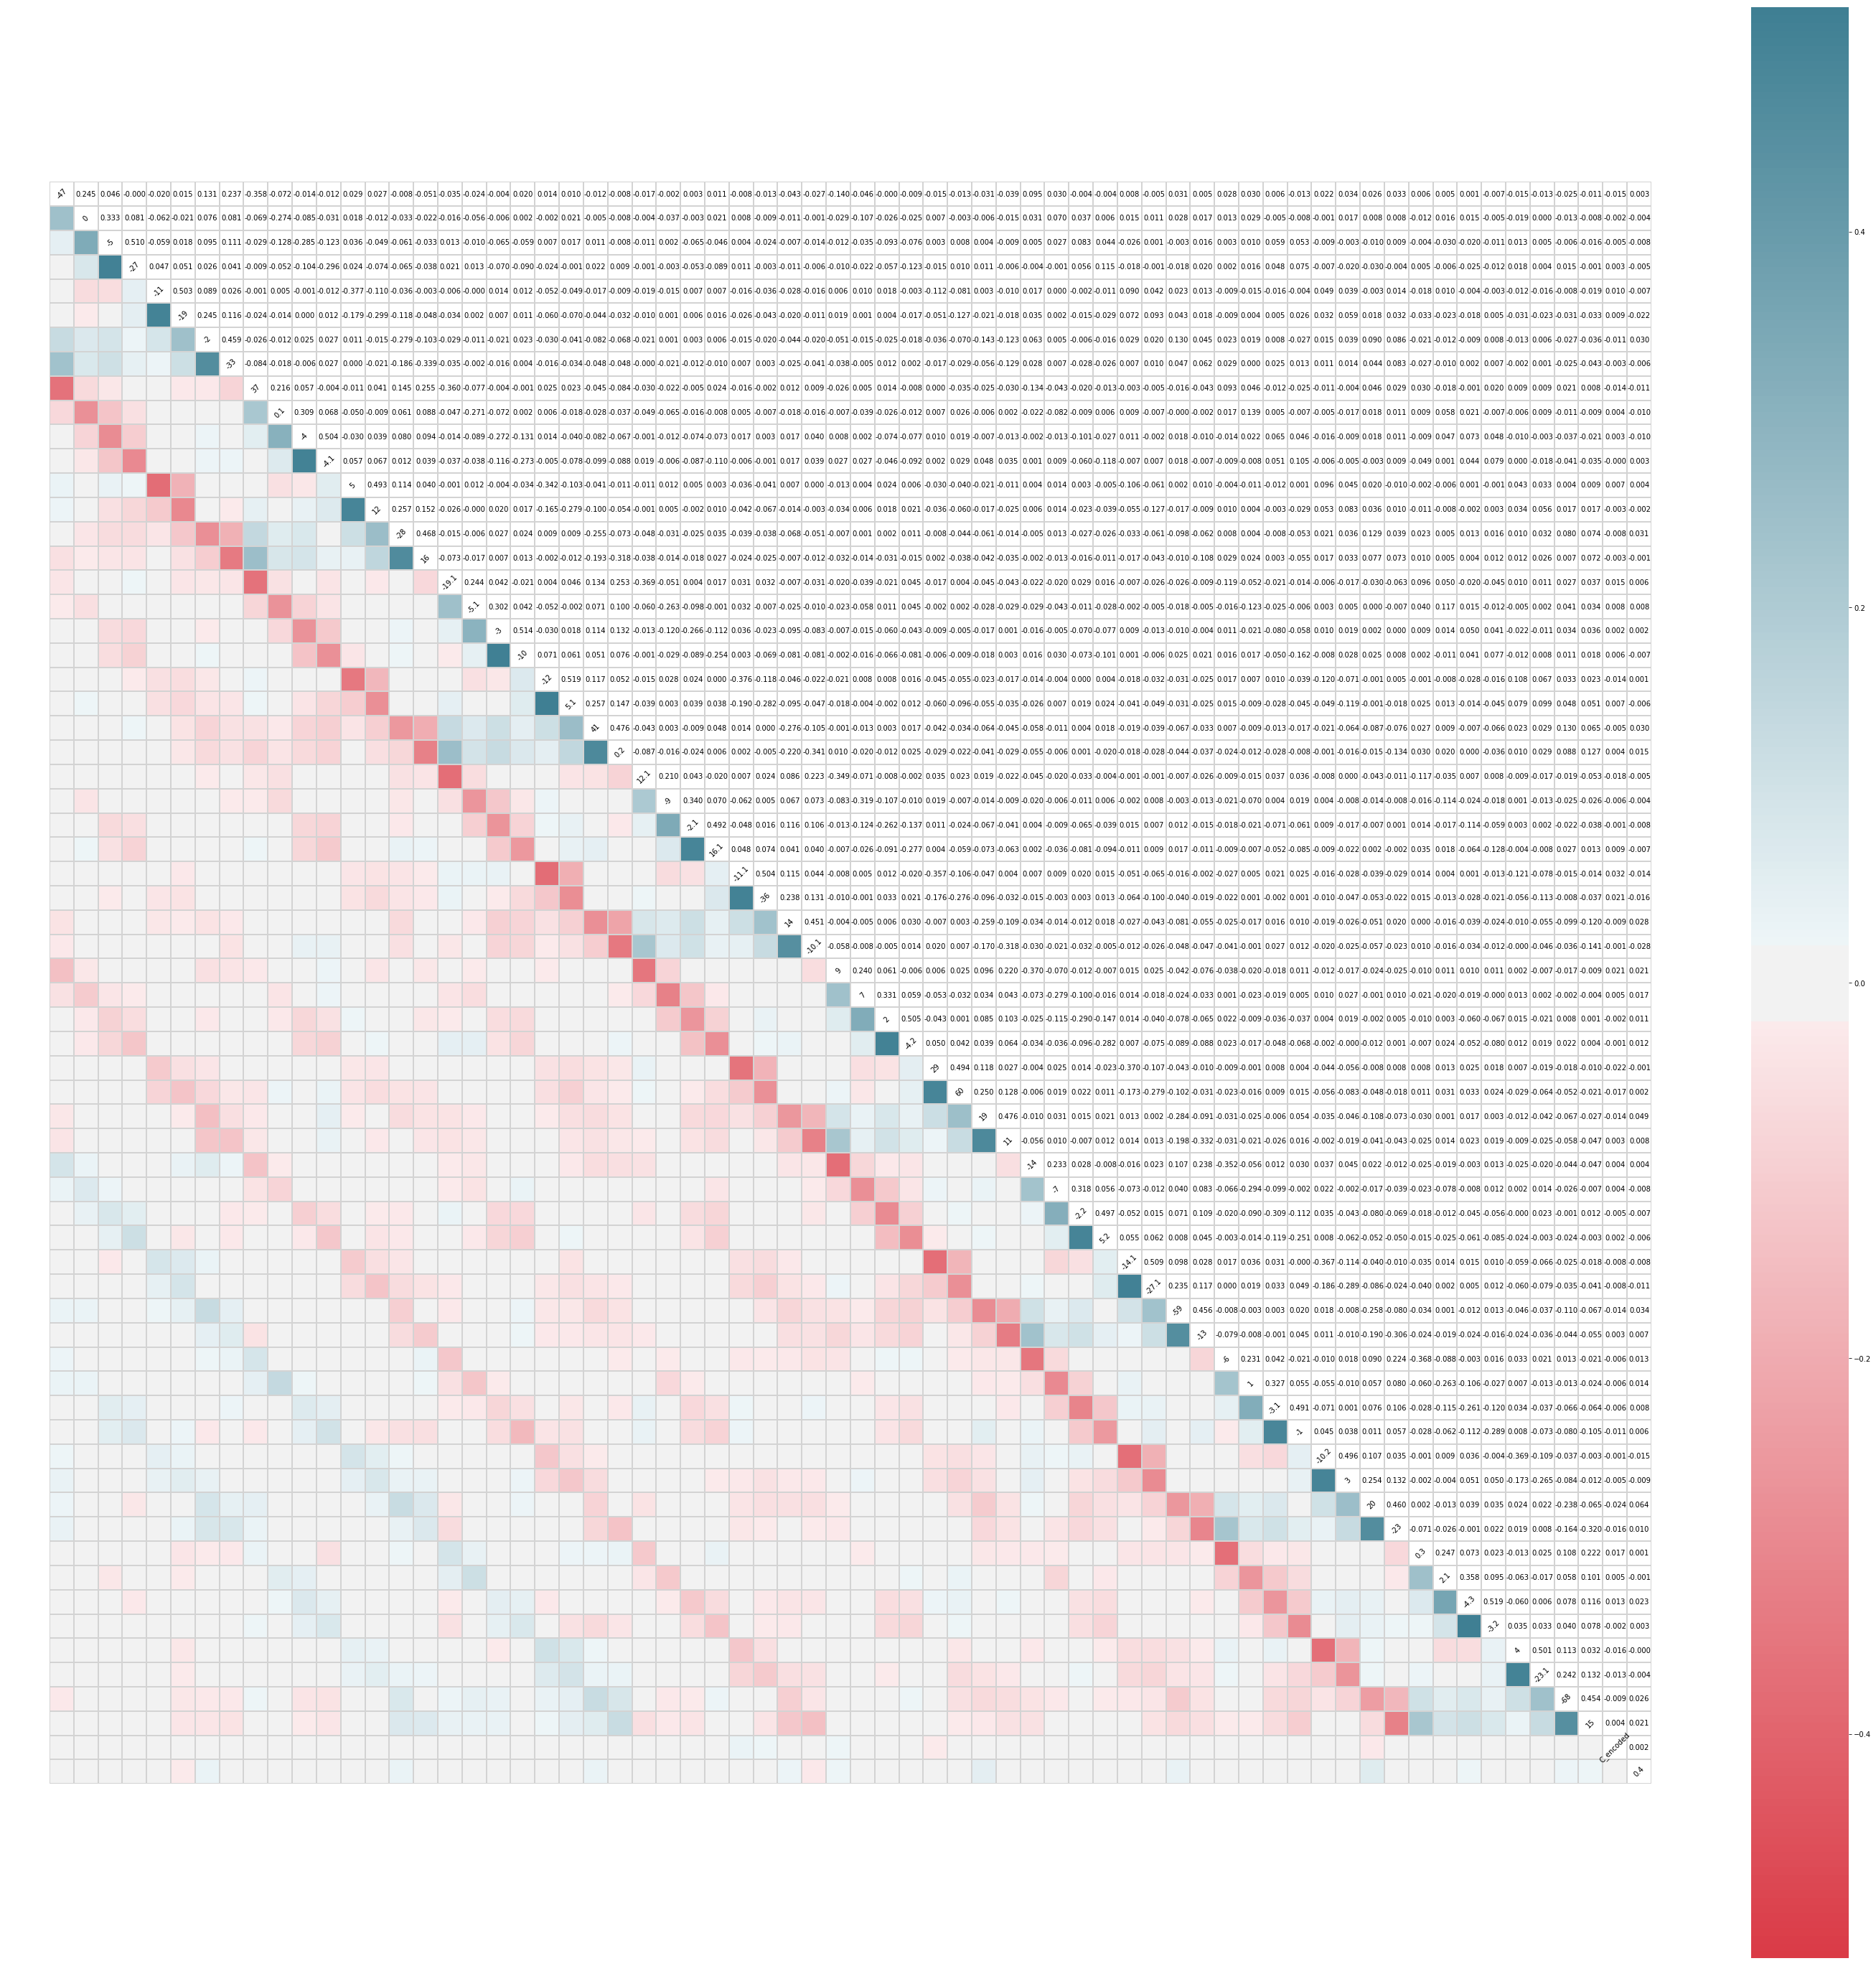

In [6]:
corrplot_(df_train_i, figsize=(50, 50))

#### Outlier Detection and Removal Using _Tukey's Method_

The next step of processing involves removing outliers from our dataset using the _Tukey Method_, which states that data that resides outside of our Tukey fences (our IQR fences (±) multiplied by 150%) can be safely eliminated to approximately maximize signal-to-noise ratio. 

**NOTE**: For this project, _Tukey's Method_ is **not recommended** due to extensive loss of data.

In [14]:
for feature in df_train_i:
    outlier_detector(df_train_i, feature, how="tukey", result="omit")

#### Outlier Detection and Removal Using _Z-Score Filtering_

The next step of processing involves removing outliers from our dataset using _Z-Score Filtering_, which states that data that resides outside of three standard deviations (approximately at the 0.3rd and 99.7th percentiles) can be safely eliminated to approximately maximize signal-to-noise ratio. 

In [16]:
for feature in df_train_i:
    outlier_detector(df_train_i, feature, how="stddev", result="omit")

#### Null Value Detection in Case of Imputation

Identify recognizeable null values across each feature in dataset and conditionally alert user.

In [17]:
null_detector(df_train_i, alert=True)
null_detector(df_test_i, alert=True)

No null values have been detected across our entire dataset (_training_ and _testing_), which is great! Let's check the testing data as well.

##### [(back to top)](#TOC)

---

## 🔹 Section C: Data Scaling & Transformation <a name="section-C"></a>

**INCLUDED PROCESSES:**

- **Data Scaling** with `StandardScaler()`
- **Dimensionality Reduction** with `PCA()`

Conditional separation of training and testing datasets into `X` and `y` data.

In [18]:
TARGET_VARIABLE = "0.4"

X_train_pro, y_train_pro = dataset_separator(df_train_i, TARGET_VARIABLE)
X_test_pro, y_test_pro = dataset_separator(df_test_i, TARGET_VARIABLE)

#### 🔸 CHECKPOINT 🔸

**Fully processed dataset (X) ready to save.**
**Fully processed labels (y) ready to save.**

#### `StandardScaler()` Fits and Transforms Full X-Data Into Scaled Datasets

In [19]:
X_train_sca, X_test_sca = dataset_scaler(X_train_pro, X_test_pro)

#### 🔸 CHECKPOINT 🔸

**Scaled dataset (X) ready to save.**

#### Principal Component Analysis with Threshold of 75% on Genomic Features

Use concatenation techniques to marry the training and testing X-datasets temporarily for synchronous dimensionality reduction.

In [20]:
X_full_sca = pd.concat([X_train_sca, X_test_sca], keys=["train", "test"])

**Call** `dimensionality_reducer()` **function to grab principal component features from dataset that represent given threshold percentage of explained target variance.**

**NOTE**: Performing dimensionality reduction with `PCA()` restricts indexing on original training and testing datasets, necessitating the use of custom training/testing-splitting objects. 

In [21]:
X_full_red = dimensionality_reducer(X_full_sca, THRESHOLD=0.75)

Total Explained Variance is 75.5004776797% with 24 Selected Reduced Features.


**Call** `train_test_split()` **to conditionally split feature-reduced dataset into training and testing datasets.**

In [33]:
train_size = float(X_train_sca.shape[0]) / float(X_full_red.shape[0])
test_size = 1 - train_size

X_train_red, X_test_red = train_test_split(X_full_red, train_size=train_size, test_size=test_size)

#### 🔸 CHECKPOINT 🔸

**Dimensionally-reduced dataset (X) ready to save.**

##### [(back to top)](#TOC)

---

## 🔹 Section D: Saving Our Processed Datasets <a name="section-D"></a>

In [39]:
REL_PATH_PROC_DATA = "../data/processed/"
DATA_X, DATA_y = "X/", "y/"
SUBDIR_PROC, SUBDIR_SCA, SUBDIR_RED = "processed/", "scaled/", "reduced/"

X_TRAIN_PROC, X_TEST_PROC = "train_pXp", "test_pXp"
X_TRAIN_SCA, X_TEST_SCA = "train_pXs", "test_pXs"
X_TRAIN_RED, X_TEST_RED = "train_pXr", "test_pXr"
y_TRAIN_PROC, y_TEST_PROC = "train_pyp", "test_pyp"

#### Saving Data: _Fully Processed X-Datasets_

In [40]:
proc.save_dataset(X_train_pro, REL_PATH_PROC_DATA + DATA_X + SUBDIR_PROC + X_TRAIN_PROC)
proc.save_dataset(X_test_pro, REL_PATH_PROC_DATA + DATA_X + SUBDIR_PROC + X_TEST_PROC)

#### Saving Data: _Scaled X-Datasets_

In [41]:
proc.save_dataset(X_train_sca, REL_PATH_PROC_DATA + DATA_X + SUBDIR_SCA + X_TRAIN_SCA)
proc.save_dataset(X_test_sca, REL_PATH_PROC_DATA + DATA_X + SUBDIR_SCA + X_TEST_SCA)

#### Saving Data: _Dimensionally Reduced X-Datasets_

In [42]:
proc.save_dataset(X_train_red, REL_PATH_PROC_DATA + DATA_X + SUBDIR_RED + X_TRAIN_RED)
proc.save_dataset(X_test_red, REL_PATH_PROC_DATA + DATA_X + SUBDIR_RED + X_TEST_RED)

#### Saving Data: _Fully Processed Targets (y)_

In [43]:
proc.save_dataset(y_train_pro, REL_PATH_PROC_DATA + DATA_y + SUBDIR_PROC + y_TRAIN_PROC)
proc.save_dataset(y_test_pro, REL_PATH_PROC_DATA + DATA_y + SUBDIR_PROC + y_TEST_PROC)

../structures/dataset_processor.py:138: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  dataset.to_csv(savepath)


##### [(back to top)](#TOC)

---

## 🔹 Appendix A: Supplementary Custom Objects <a name="appendix-A"></a>

#### A[1]: 6Nomads Dataset Processor.

To view the **Data Processor Engine**, please follow the following steps:

1. Navigate to the `structures` sibling directory. 
2. Access the `dataset_processor.py` file. 
3. View the `Dataset_Processor()` object architecture.

#### A[2]: Feature Visualizer.

Function to produce value-based histogram on each feature. 

In [8]:
def feature_visualizer(dataset, feature, buckets=20):
    """ Function to produce bar-chart histogram-based visualization from single feature of dataset. """
    plt.hist(dataset[feature].values, bins=buckets)
    plt.show()

#### A[3]: Outlier Removal using Custom Detection Method.

Function to filter data within feature of DataFrame using Tukey's IQR Method or Normal-distribution-based sigma removal.

In [9]:
def outlier_detector(dataset, feature, how="tukey", result="omit", percentile=25, sigma=3):
    """
    Function to filter data within feature of DataFrame.
    
    INPUT(S):
        {dataset}:
            - pd.DataFrame
        {feature}:
            - str
        {how}:
            - str(tukey)
            - str(lookup)
        {result}
            - str(omit)
            - str(mean)
        
    OUTPUT(S):
        - Nonetype: 
    """
    data = sorted(dataset[feature].values)
    if how == "tukey":
        Q1, Q3 = np.percentile(data, [50 - percentile, 50 + percentile])
        IQR = Q3 - Q1
        LOWER_FENCE, UPPER_FENCE = (Q1 - (1.5 * IQR), Q3 + (1.5 * IQR))
    elif how == "stddev":
        LOWER_FENCE, UPPER_FENCE = (np.mean(data) - (sigma * np.std(data)), np.mean(data) + (sigma * np.std(data)))
    
    ARG_LOWER_OUTLIERS, ARG_UPPER_OUTLIERS = (dataset[feature] < LOWER_FENCE), (dataset[feature] > UPPER_FENCE)
    if result == "omit":
        dataset.drop(dataset[ARG_LOWER_OUTLIERS | ARG_UPPER_OUTLIERS].index, inplace=True)

#### A[4]: Null Value Detector with Custom User Alerts.

Function to detect null values across each feature across input dataset and alert user based on null value presence.

In [10]:
def null_detector(dataset, alert=True):
    """ Function to detect null values across all features of input dataset. """
    for feature in dataset:
        null_count = len(dataset[dataset[feature].isna()])
        if null_count > 0:
            print("FEATURE='{}': {} Null Values Detected!".format(feature, null_count))
        else:
            pass

#### A[5]: Dataset Separator Function for X-y Consolidation.

Function to break input dataset into X- and y-datasets for predictive analysis.

In [11]:
def dataset_separator(dataset, target):
    """ Function to split input dataset into X and y datasets. """
    X = dataset.drop(columns=target)
    y = dataset[target]
    return X, y

#### A[6]: Dataset Scaling Function for X-Data Reshaping.

Function to scale input data (`X`) for predictive purposes.

In [12]:
def dataset_scaler(training_data, testing_data, obj=StandardScaler):
    """ Function to scale X-data using custom input algorithm. """
    SCALED_FEATURES = [feature + "_sca" for feature in training_data]
    scaler = obj()
    scaler.fit(training_data)
    X_train_sca = pd.DataFrame(scaler.transform(training_data).T, SCALED_FEATURES).T
    X_test_sca = pd.DataFrame(scaler.transform(testing_data).T, SCALED_FEATURES).T
    return X_train_sca, X_test_sca

#### A[7]: Dimensionality Reduction Algorithm for X-Data Signal-to-Noise Improvement.

Function to apply dimensionality reduction techniques to retain signal-rich features.

In [13]:
def dimensionality_reducer(dataset, THRESHOLD=0.50, obj=PCA):
    """ 
    Function to perform dimensionality reduction on given dataset and return reduced features
    that explain the given threshold percentage of variance across the data as a whole.
    """
    reducer = obj()
    reducer.fit(dataset)
    dataset_red = reducer.transform(dataset)
    
    explained_variances = reducer.explained_variance_ratio_
    reduced_component_variances, reduced_components_within_threshold = list(), 0
    
    for index, variance in enumerate(explained_variances):
        reduced_component_variances.append("Explained Variance for Feature {}: {}".format(index + 1, variance))
        
    for index, variance in enumerate(explained_variances):
        if reduced_components_within_threshold < THRESHOLD:
            reduced_components_within_threshold += variance
        else:
            break

    NUM_REDUCED_FEATURES = index + 1
    RED_COLUMNS = ["rf{}".format(component_index + 1) for component_index in range(NUM_REDUCED_FEATURES)]
    print("Total Explained Variance is {}% with {} Selected Reduced Features.".format(reduced_components_within_threshold * 100, 
                                                                                      NUM_REDUCED_FEATURES))
    return pd.DataFrame(dataset_red[:, :NUM_REDUCED_FEATURES], columns=RED_COLUMNS)

##### [(back to top)](#TOC)

---